#                Diabetes Prediction using Machine Learning Algorithms


Diabetes is a medical condition which involves high blood sugar levels over an entended period of time. This occurs when the body does not produce enough insulin for the intake of blood sugar into the body cells thereby, resulting to high sugar levels in the blood. Symptoms associated with this condition includes frequent urination, increased hunger and thirst. Over time, severe conditions could lead to heart disease, kidney disease, vision loss and even dead.

The objective of this study is to predict whether a patient has diabetes or not based on certain features provided in the datasets. It is strickly restricted on female patients above the age of 21 and from the Indian tribe of pima.
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.





### Objective
The aim here is to build an optimal model which predict      whether a patient has diabetes or not when it is fitted to a new dataset.

### Details about the dataset:
The dataset contains several predictor variables and a target variable called diabetes. Below is a rundown of the predictor variables and the target variable.

num_preg: Number of times pregnant

glucose_conc: Plasma glucose concentration a 2 hours in an oral
glucose tolerance test

diastolic_bp: Diastolic blood pressure (mm Hg)

thickness: Triceps skin fold thickness (mm)

insulin: 2-Hour serum insulin (mu U/ml)

bmi: Body mass index (weight in kg/(height in m)^2)

diab_pred: Diabetes pedigree function

age: Age (years)

skin

diabetes: Target variable (True or False)

### 1. Exploratory Data Analysis 

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import scale, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.simplefilter(action = 'ignore')

%matplotlib inline

In [2]:
# Load the data using pandas

df = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
# Check for the shape of the datasets(number of rows and columns)

df.shape

(768, 10)

In [5]:
# Information about the features of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [6]:
# Descriptive statistics of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.0000
glucose_conc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.0000
diastolic_bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.0000
thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.0000
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.0000
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.1000
diab_pred,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.4200
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.0000
skin,768.0,0.809136,0.628517,0.000,0.00000,0.9062,1.26080,3.9006


In [7]:
# Check for imbalance/distribution of the outcome variable.

df['diabetes'].value_counts()*100/len(df)

False    65.104167
True     34.895833
Name: diabetes, dtype: float64

In [8]:
# Exame the class of the outcome variable

df['diabetes'].value_counts()

False    500
True     268
Name: diabetes, dtype: int64

In [9]:
# Check for null values in the datasets

df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

<AxesSubplot:>

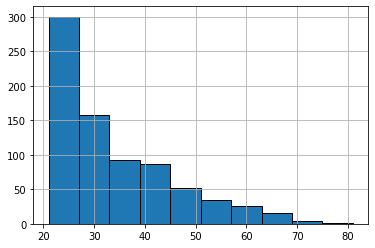

In [10]:
# look into te distribution of the age variable

df['age'].hist(edgecolor = 'black')

In [11]:
print("Max Age: " + str(df["age"].max()) + " Min Age: " + str(df["age"].min()))

Max Age: 81 Min Age: 21


<AxesSubplot:xlabel='skin', ylabel='Density'>

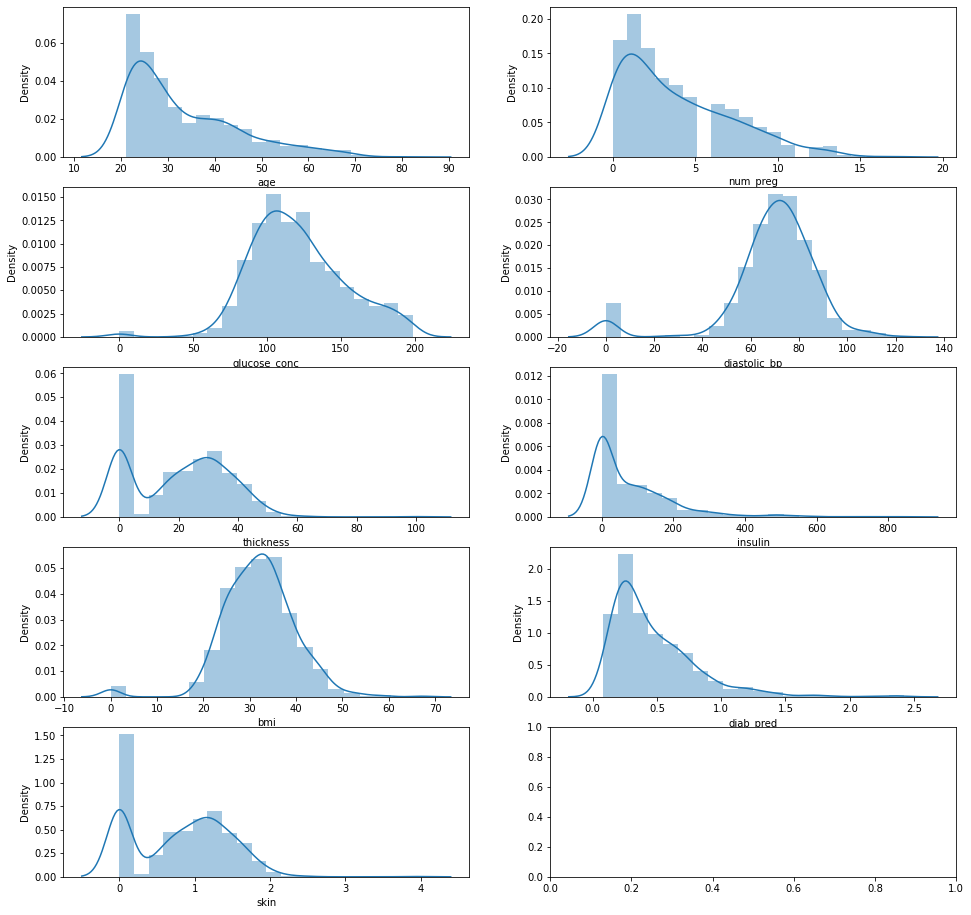

In [12]:
# Histogram and density graphs of all variables

fig, ax = plt.subplots(5,2, figsize=(16,16))
sns.distplot(df.age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.num_preg, bins = 20, ax=ax[0,1]) 
sns.distplot(df.glucose_conc, bins = 20, ax=ax[1,0]) 
sns.distplot(df.diastolic_bp, bins = 20, ax=ax[1,1]) 
sns.distplot(df.thickness, bins = 20, ax=ax[2,0])
sns.distplot(df.insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.bmi, bins = 20, ax=ax[3,0]) 
sns.distplot(df.diab_pred , bins = 20, ax=ax[3,1]) 
sns.distplot(df.skin, bins = 20, ax=ax[4,0]) 

In [13]:
df.groupby("diabetes").agg({"num_preg":"mean"})

,num_preg
diabetes,
False,3.298000
True,4.865672


In [14]:
df.groupby("diabetes").agg({"age":"mean"})

,age
diabetes,
False,31.190000
True,37.067164


In [15]:
df.groupby("diabetes").agg({"age":"max"})

,age
diabetes,
False,81
True,70


In [16]:
df.groupby("diabetes").agg({"insulin": "mean"})

,insulin
diabetes,
False,68.792000
True,100.335821


In [17]:
df.groupby("diabetes").agg({"insulin": "max"})

,insulin
diabetes,
False,744
True,846


In [18]:
df.groupby("diabetes").agg({"glucose_conc": "mean"})

,glucose_conc
diabetes,
False,109.980000
True,141.257463


In [19]:
df.groupby("diabetes").agg({"glucose_conc": "max"})

,glucose_conc
diabetes,
False,197
True,199


In [20]:
df.groupby("diabetes").agg({"bmi": "mean"})

,bmi
diabetes,
False,30.304200
True,35.142537


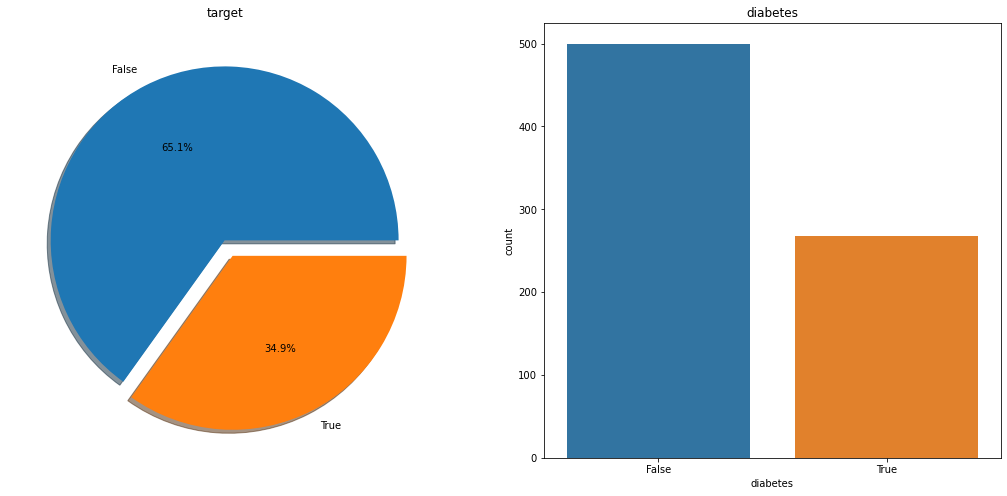

In [21]:
# Take a look at the distribution of the diabetes variable.

f,ax=plt.subplots(1,2,figsize=(18,8))
df['diabetes'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('diabetes',data=df,ax=ax[1])
ax[1].set_title('diabetes')
plt.show()

In [22]:
# Check for the correlation among the different features

df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


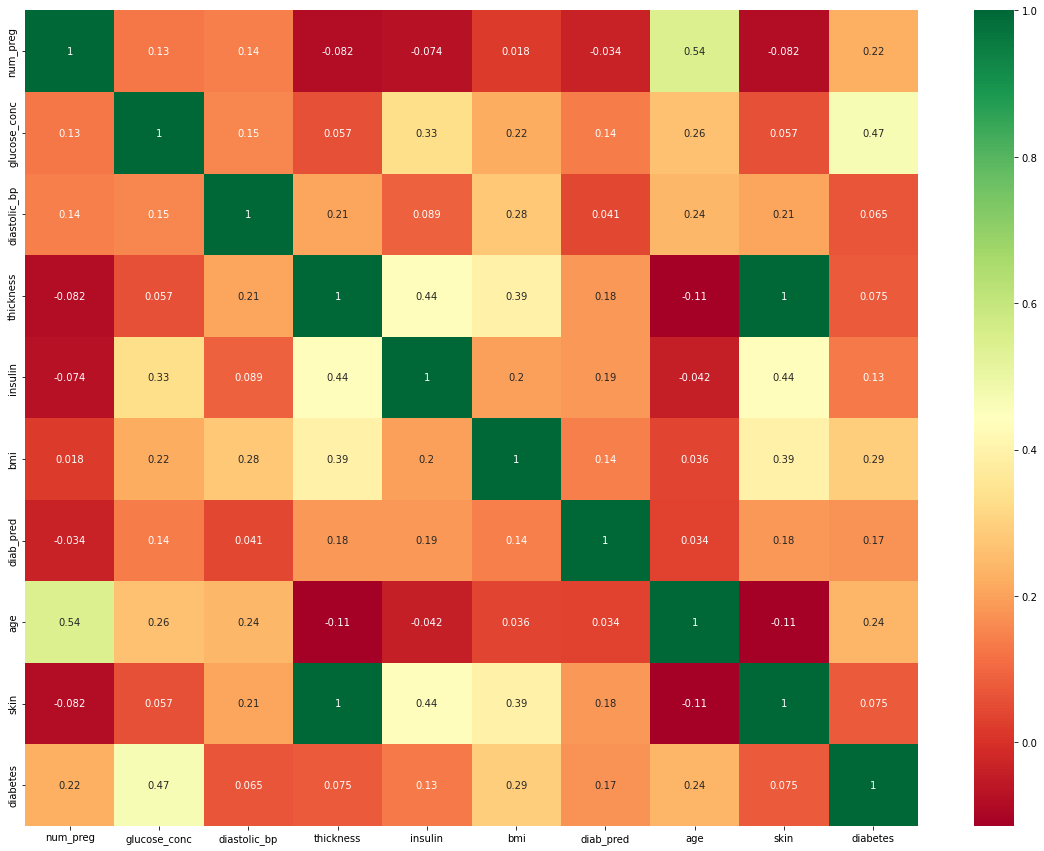

In [23]:
# Plot the heat map (correlation matrix graph of the dataset)

ax = plt.figure(figsize=(20,15))
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

### 2. Data Pre-processing

#### 2.1 Missing Observation Analysis 

Looking at the data, there are certain features with 0 and this does not make sense for example bmi of 0. Therefore, in features where it does make sense, we replace it with NaN.

In [24]:
df[['glucose_conc','diastolic_bp','thickness','insulin','bmi','skin']] = df[['glucose_conc','diastolic_bp','thickness','insulin','bmi','skin']].replace(0,np.NaN)

In [25]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1.3790,True
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,1.1426,False
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,NaN,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0.9062,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.3790,True


In [26]:
# Examine the datatset for missing values

df.isnull().sum()

num_preg          0
glucose_conc      5
diastolic_bp     35
thickness       227
insulin         374
bmi              11
diab_pred         0
age               0
skin            227
diabetes          0
dtype: int64

<AxesSubplot:>

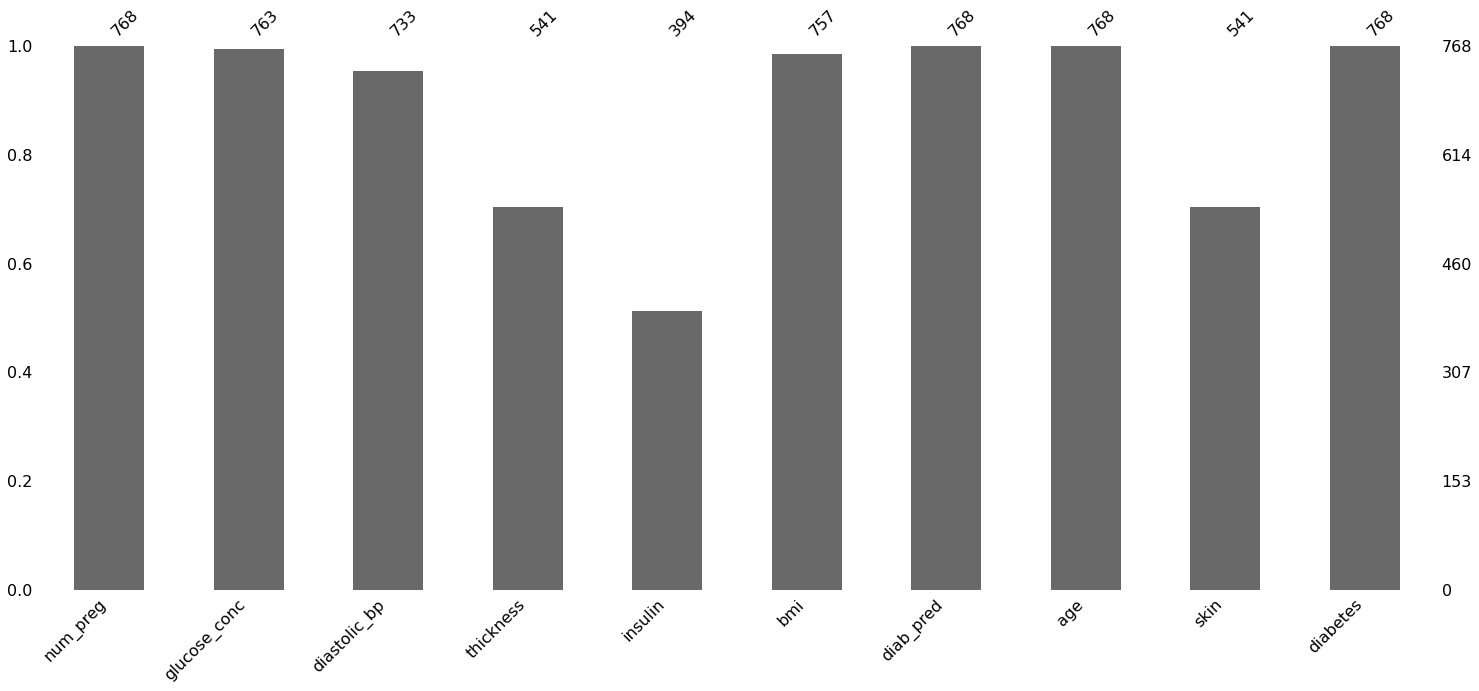

In [27]:
msno.bar(df)

In [28]:
# Replace the missing values with the median of each variable
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'diabetes']].groupby(['diabetes'])[[var]].median().reset_index()
    return temp


In [29]:
columns = df.columns
columns = columns.drop("diabetes")
for i in columns:
    median_target(i)
    df.loc[(df['diabetes'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['diabetes'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [30]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1.3790,True
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,1.1426,False
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1.2608,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0.9062,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.3790,True


In [31]:
# Missing values are now filled

df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

#### 2.2 Local Outlier Factor (LOF)

In [32]:
# Check for outliers using the LOF method

lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [33]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.3043866 , -3.0607622 , -2.48878327, -2.37287789, -2.1530787 ,
       -2.09687554, -2.0771695 , -2.01092058, -1.95236954, -1.8635732 ,
       -1.740229  , -1.72694871, -1.71667472, -1.70332196, -1.6687999 ,
       -1.66322124, -1.64289466, -1.64185916, -1.61645763, -1.60048773,
       -1.59893221, -1.59603876, -1.57029105, -1.55871718, -1.55670838,
       -1.5184107 , -1.50837157, -1.50274548, -1.50155383, -1.49701514])

In [34]:
# Choose the threshod value base on lof scores

threshold = np.sort(df_scores)[7]
threshold

-2.010920578932166

In [35]:
# Delete those higher than threshold

outlier = df_scores > threshold
df = df[outlier]

In [36]:
df.shape

(760, 10)

### 3. Label Encoding
Categorical variables in the data set should be converted into numerical values. 

In [37]:
df['diabetes'] = df['diabetes'].map({True:1, False:0})

In [38]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1.3790,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,1.1426,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1.2608,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0.9062,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.3790,1


In [39]:
X = df.drop(['diabetes'], axis = 1)
y = df['diabetes']

In [40]:
# Standardizing the variables in the dataset will help with the performance

cols = X.columns
index = X.index

transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [41]:
X.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,0.6,0.770186,0.000,1.000000,1.000000,0.177778,0.672313,1.235294,1.000000
1,-0.4,-0.795031,-0.375,0.142857,0.000000,-0.600000,-0.046906,0.117647,0.142857
2,1.0,1.639752,-0.500,0.571429,1.000000,-0.966667,0.789577,0.176471,0.571429
3,-0.4,-0.695652,-0.375,-0.714286,-0.126866,-0.433333,-0.526384,-0.470588,-0.714286
4,-0.6,0.496894,-2.000,1.000000,0.977612,1.233333,5.000651,0.235294,1.000000


### 4. Base Models

In [42]:
# Validation scores of all base models

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

In [43]:
# evaluate each model in turn
#cv = range(2,11)
results = []
names = []

for name, model in models:
    #for i in cv:
        cv_results = cross_val_score(model, X, y, cv=5)
        mean_result = cv_results.mean()
        results.append(cv_results)
        names.append(name)
        
        print(f'{name}: {mean_result:.4f}')

LR: 0.7842
KNN: 0.8513
CART: 0.8487
RF: 0.8789
SVM: 0.8553
XGB: 0.8947
LightGBM: 0.8921


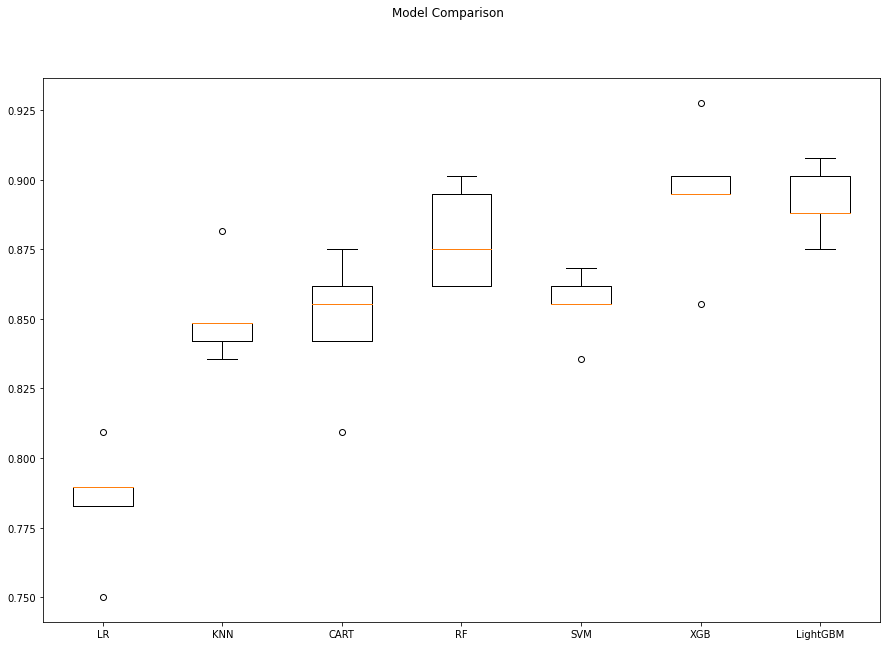

In [44]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 5. Model Tuning

#### 5.1 Random Forest Tuning

In [45]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

rf_model = RandomForestClassifier(random_state = 12345)

gs_rf_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [46]:
gs_rf_cv.best_params_

{'max_depth': 8,
 'max_features': 7,
 'min_samples_split': 10,
 'n_estimators': 200}

#### 5.1.1 Final Model After Tuning

In [47]:
rf = RandomForestClassifier(**gs_rf_cv.best_params_).fit(X, y)
cross_val_score(rf, X, y, cv=10).mean()

0.8907894736842105

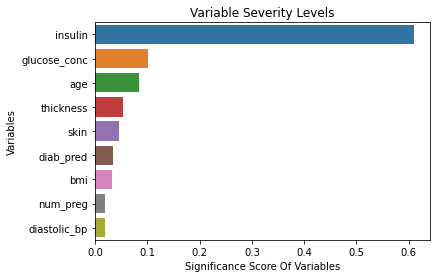

In [48]:
feature_imp = pd.Series(rf.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

#### 5.2 LightGBM Tuning

In [50]:
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}

lgbm_model = LGBMClassifier(random_state = 12345)

gs_lgbm_cv = GridSearchCV(lgbm_model, 
                     lgbm_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, y)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


In [53]:
gs_lgbm_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

##### 5.2.1 Final Model After Tuning

In [55]:
lgbm = LGBMClassifier(**gs_lgbm_cv.best_params_).fit(X,y)
cross_val_score(lgbm, X, y, cv = 10).mean()

0.8973684210526317

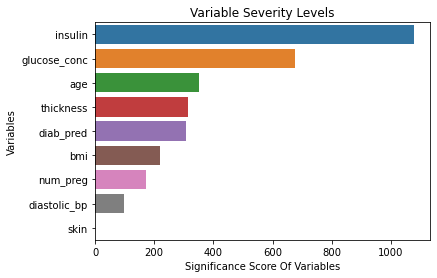

In [56]:
feature_imp = pd.Series(lgbm.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

#### 5.3 XGBoost Tuning

In [57]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

xgb_model = GradientBoostingClassifier(random_state = 12345)

gs_xgb_cv = GridSearchCV(xgb_model, xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X,y)


Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [58]:
gs_xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'min_samples_split': 0.1,
 'n_estimators': 1000,
 'subsample': 1.0}

In [59]:
xgb =  GradientBoostingClassifier(**gs_xgb_cv.best_params_).fit(X,y)
cross_val_score(xgb, X, y, cv=10).mean()

0.8960526315789474

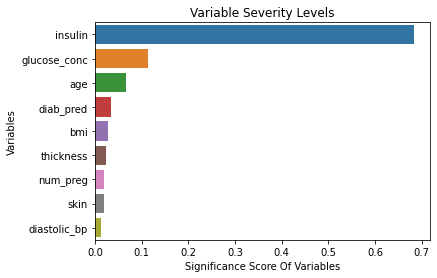

In [60]:
feature_imp = pd.Series(xgb.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

### 6. Overview of Top Performing Models

In [61]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 10, n_estimators = 200)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345, learning_rate = 0.01,  max_depth = 3, n_estimators = 500)))

In [62]:
# Evaluate each model in turn

results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv = 10)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean():.4f}')

RF: 0.8947
XGB: 0.8895
LightGBM: 0.8974


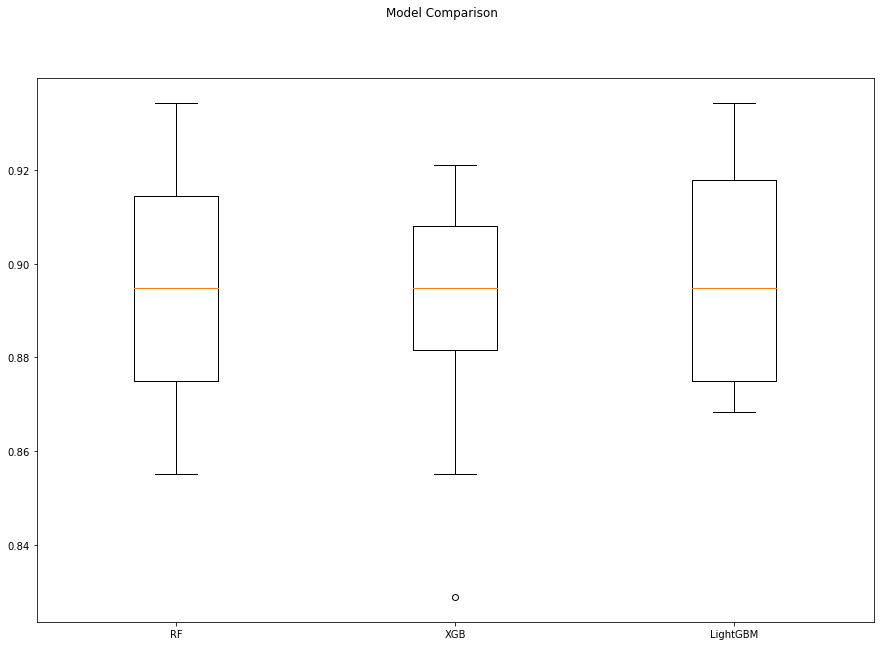

In [63]:
# Boxplot of the various models

fig = plt.figure(figsize=(15,10))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 7. Conclusion

The aim of this work was to predict whether a patient has diabetes or not based on several medical predictor variables. This require us to build not only an optmal model but one robust enough to do the prediction. 

1. Load the necessary libraries needed for the study and the diabetes dataset.
2. Carried out a thorough exploratory data analysis on the dataset. Among several things, we check for the shape of the dataset, information about the different features and their descriptive statistics, imbalannce in the target variable, missing values, correlation among the features and more.
3. During data pre-processing, the 0 entries in the dataset for some features are repplaced with NaN. We also did label encoding converting the target variable from categorical values to numeric.
4. Seven models were used in the study which includes Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost and LightGBM through the validation technique. The hyper parameter of these models were optimized and the models recalculated.
5. Three models stood out in the study but so far lightGBM model with optimized hyper parameter is the best.